In [1]:
import pandas as pd
from tabulate import tabulate
import textwrap
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set default font
import matplotlib.font_manager as fm

font_path = '/usr/share/fonts/noto_sans_mono/NotoSansMono_SemiCondensed-SemiBold.ttf'
font_prop = fm.FontProperties(fname=font_path)

sns.set(font=font_prop.get_name())
mpl.rcParams['font.family'] = font_prop.get_name()
plt.rcParams["font.weight"] = 'semibold'

bold = 'extra bold'

sns.set_style(style='darkgrid')

In [3]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 200)

In [4]:
df_dict = pd.read_excel('data/LCDataDictionary.xlsx')
df_dict

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower is now delinquent.
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan application
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by the borrower during registration.
...,...,...
148,settlement_amount,The loan amount that the borrower has agreed to settle for
149,settlement_percentage,The settlement amount as a percentage of the payoff balance amount on the loan
150,settlement_term,The number of months that the borrower will be on the settlement plan
151,NaN,NaN


In [5]:
df_dict.isna().sum()

LoanStatNew    2
Description    1
dtype: int64

In [6]:
df_dict.duplicated().sum()

0

In [7]:
df_dict.dropna(inplace=True)

In [8]:
df_dict.rename(columns={'LoanStatNew': 'column', 'Description': 'definition'}, inplace=True)

In [9]:
# split the text to lines of 80 characters
df_dict['definition'] = df_dict['definition'].apply(lambda x: '\n'.join(textwrap.wrap(x, width=80)))

In [10]:
df_dict['column'].str.startswith(' ').sum()

0

In [11]:
df_dict['column'].str.endswith(' ').sum()

12

In [12]:
df_dict['column'] = df_dict['column'].str.strip()

In [13]:
print(tabulate(df_dict, headers='keys', tablefmt='pipe'))

|     | column                                     | definition                                                                       |
|----:|:-------------------------------------------|:---------------------------------------------------------------------------------|
|   0 | acc_now_delinq                             | The number of accounts on which the borrower is now delinquent.                  |
|   1 | acc_open_past_24mths                       | Number of trades opened in past 24 months.                                       |
|   2 | addr_state                                 | The state provided by the borrower in the loan application                       |
|   3 | all_util                                   | Balance to credit limit on all trades                                            |
|   4 | annual_inc                                 | The self-reported annual income provided by the borrower during registration.    |
|   5 | annual_inc_joint                        

In [14]:
with open('data/data_dictionary.md', 'w') as f:
    f.write(tabulate(df_dict, headers='keys', tablefmt='pipe'))

In [15]:
def column_definition(col, df_dict=df_dict):
    """Get the definition of a column in the dataset."""
    try:
        return df_dict[df_dict['column'] == col]['definition'].values[0]
    except IndexError:
        return 'Definition not found'

In [16]:
column_definition('loan_amnt')

'The listed amount of the loan applied for by the borrower. If at some point in\ntime, the credit department reduces the loan amount, then it will be reflected\nin this value.'

In [17]:
column_definition('column-not-found')

'Definition not found'

In [18]:
df0 = pd.read_csv('data/loan.csv', low_memory=False)
df0

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500.0,36 months,13.56,84.92,C,C1,Chef,10+ years,RENT,55000.0,Not Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,109xx,NY,18.24,0.0,Apr-2001,1.0,NaN,45.0,9.0,1.0,4341,10.3,34.0,w,2386.02,2386.02,167.020000,167.02,113.98,53.04,0.0,0.0,0.0,Feb-2019,84.92,Mar-2019,Feb-2019,0.0,NaN,1,Individual,NaN,NaN,NaN,0.0,0.0,16901.0,2.0,2.0,1.0,2.0,2.0,12560.0,69.0,2.0,7.0,2137.0,28.0,42000.0,1.0,11.0,2.0,9.0,1878.0,34360.0,5.9,0.0,0.0,140.0,212.0,1.0,1.0,0.0,1.0,NaN,2.0,NaN,0.0,2.0,5.0,3.0,3.0,16.0,7.0,18.0,5.0,9.0,0.0,0.0,0.0,3.0,100.0,0.0,1.0,0.0,60124.0,16901.0,36500.0,18124.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000.0,60 months,18.94,777.23,D,D2,Postmaster,10+ years,MORTGAGE,90000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,713xx,LA,26.52,0.0,Jun-1987,0.0,71.0,75.0,13.0,1.0,12315,24.2,44.0,w,29387.75,29387.75,1507.110000,1507.11,612.25,894.86,0.0,0.0,0.0,Feb-2019,777.23,Mar-2019,Feb-2019,0.0,NaN,1,Individual,NaN,NaN,NaN,0.0,1208.0,321915.0,4.0,4.0,2.0,3.0,3.0,87153.0,88.0,4.0,5.0,998.0,57.0,50800.0,2.0,15.0,2.0,10.0,24763.0,13761.0,8.3,0.0,0.0,163.0,378.0,4.0,3.0,3.0,4.0,NaN,4.0,NaN,0.0,2.0,4.0,4.0,9.0,27.0,8.0,14.0,4.0,13.0,0.0,0.0,0.0,6.0,95.0,0.0,1.0,0.0,372872.0,99468.0,15000.0,94072.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000.0,36 months,17.97,180.69,D,D1,Administrative,6 years,MORTGAGE,59280.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,D

<IPython.core.display.Javascript object>

In [19]:
set(df0.columns) - set(df_dict['column'])

{'verification_status_joint'}

In [20]:
set(df_dict['column']) - set(df0.columns)

{'fico_range_high',
 'fico_range_low',
 'last_fico_range_high',
 'last_fico_range_low',
 'sec_app_fico_range_high',
 'sec_app_fico_range_low',
 'verified_status_joint'}

Let's see if the missing `verification_status_joint` column is in fact the
same as `verified_status_joint` in the data dictionary.

In [21]:
print(column_definition('verified_status_joint'))

Indicates if the co-borrowers' joint income was verified by LC, not verified, or
if the income source was verified


In [22]:
df0['verification_status_joint'].value_counts(dropna=False)

verification_status_joint
NaN                2144938
Not Verified         57403
Source Verified      34827
Verified             23500
Name: count, dtype: int64

Seems to be the same column. Let's rename it to `verification_status_joint`.

In [23]:
# change verified_status_joint to verification_status_joint
df_dict.loc[df_dict['column'] == 'verified_status_joint', 'column'] = 'verification_status_joint'

In [24]:
set(df0.columns) - set(df_dict['column'])

set()

In [25]:
print(column_definition('verification_status_joint'))

Indicates if the co-borrowers' joint income was verified by LC, not verified, or
if the income source was verified


Now we have definitions for all columns in the dataset.

In [26]:
nan_df = df0.isna().sum().to_frame('count')
nan_df['percentage'] = (nan_df['count'] / len(df0) * 100).map('{:.2f}%'.format)

In [27]:
print(nan_df[nan_df['count'] > 0].sort_values(['count'], ascending=False).to_string())

                                              count percentage
id                                          2260668    100.00%
url                                         2260668    100.00%
member_id                                   2260668    100.00%
orig_projected_additional_accrued_interest  2252242     99.63%
hardship_length                             2250055     99.53%
hardship_reason                             2250055     99.53%
hardship_status                             2250055     99.53%
deferral_term                               2250055     99.53%
hardship_amount                             2250055     99.53%
hardship_start_date                         2250055     99.53%
hardship_end_date                           2250055     99.53%
payment_plan_start_date                     2250055     99.53%
hardship_loan_status                        2250055     99.53%
hardship_dpd                                2250055     99.53%
hardship_payoff_balance_amount              2250055    

Columns id, url, and member_id have no data. Let's drop them.

In [28]:
df = df0.copy()
df.drop(columns=['id', 'url', 'member_id'], inplace=True)

/tmp/ipykernel_3251/1663575970.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f'{i}%' for i in range(0, max_percentage, 10)])


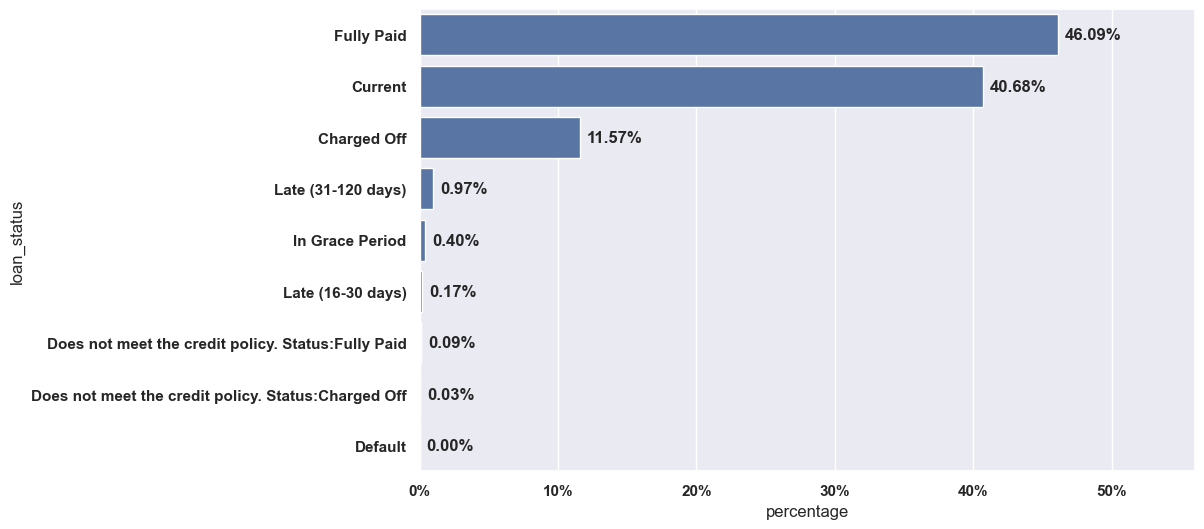

In [29]:
# loan_status counts
viz_df = df['loan_status'].value_counts(dropna=False).to_frame('count')
viz_df['percentage'] = (viz_df['count'] / len(df) * 100)
viz_df['percentage_txt'] = viz_df['percentage'].map('{:.2f}%'.format)

fig, ax = plt.subplots(figsize=(10, 6))

sns.barplot(
    data=viz_df,
    x='percentage',
    y=viz_df.index
    )

max_percentage = viz_df['percentage'].max().astype(int) + 10

ax.set_xticklabels([f'{i}%' for i in range(0, max_percentage, 10)])

ax.set_xlim(0, max_percentage)

for i, row in viz_df.iterrows():
    ax.text(row['percentage'] + 0.5, i, row['percentage_txt'], va='center')

plt.show()

In [30]:
print(column_definition('loan_status'))

Current status of the loan


We could define a default as a loan in status `Default` or in status `Charged Off`. We will keep the defaults according to this definition, and the fully paid loans. 

In [31]:
df = df[df['loan_status'].isin(['Default', 'Charged Off', 'Fully Paid'])]
df

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
100,30000,30000,30000.0,36 months,22.35,1151.16,D,D5,Supervisor,5 years,MORTGAGE,100000.0,Source Verified,Dec-2018,Fully Paid,n,NaN,debt_consolidation,Debt consolidation,917xx,CA,30.46,0.0,Jan-2012,0.0,51.0,84.0,11.0,1.0,15603,37.0,19.0,w,0.0,0.0,30026.442500,30026.44,30000.00,26.44,0.00,0.0,0.0,Jan-2019,30082.32,NaN,Jan-2019,0.0,NaN,1,Joint App,150000.0,23.38,Source Verified,0.0,0.0,472330.0,1.0,3.0,2.0,2.0,2.0,82850.0,75.0,0.0,1.0,9713.0,60.0,42200.0,1.0,1.0,3.0,4.0,42939.0,15181.0,46.9,0.0,0.0,83.0,73.0,23.0,2.0,1.0,23.0,NaN,8.0,NaN,0.0,3.0,4.0,3.0,5.0,10.0,6.0,8.0,4.0,11.0,0.0,0.0,0.0,2.0,89.5,33.3,1.0,0.0,527120.0,98453.0,28600.0,101984.0,52417.0,Jul-2006,0.0,1.0,16.0,25.2,2.0,15.0,0.0,0.0,70.0,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
152,40000,40000,40000.0,60 months,16.14,975.71,C,C4,Assistant to the Treasurer (Payroll),< 1 year,MORTGAGE,45000.0,Verified,Dec-2018,Fully Paid,n,NaN,credit_card,Credit card refinancing,456xx,OH,50.53,0.0,Jun-2009,0.0,NaN,NaN,18.0,0.0,34971,64.5,37.0,w,0.0,0.0,40856.678960,40856.68,40000.00,856.68,0.00,0.0,0.0,Feb-2019,40910.48,NaN,Feb-2019,0.0,NaN,1,Joint App,92000.0,35.66,Verified,0.0,0.0,271068.0,2.0,8.0,3.0,4.0,5.0,126749.0,87.0,1.0,1.0,5874.0,75.0,54200.0,4.0,2.0,4.0,5.0,15059.0,14930.0,67.3,0.0,0.0,114.0,70.0,2.0,2.0,1.0,2.0,NaN,9.0,NaN,0.0,7.0,9.0,7.0,7.0,26.0,9.0,10.0,9.0,18.0,0.0,0.0,0.0,4.0,100.0,42.9,0.0,0.0,344802.0,161720.0,45700.0,167965.0,47188.0,Apr-1990,0.0,1.0,32.0,61.1,16.0,19.0,0.0,0.0,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
170,20000,20000,20000.0,36 months,7.56,622.68,A,A3,Teacher,10+ years,MORTGAGE,100000.0,Not Verified,Dec-201

In [32]:
print(column_definition('orig_projected_additional_accrued_interest'))

The original projected additional interest amount that will accrue for the given
hardship payment plan as of the Hardship Start Date. This field will be null if
the borrower has broken their hardship payment plan.


In [33]:
print(column_definition('deferral_term'))

Amount of months that the borrower is expected to pay less than the contractual
monthly payment amount due to a hardship plan


In [34]:
print(column_definition('payment_plan_start_date'))

The day the first hardship plan payment is due. For example, if a borrower has a
hardship plan period of 3 months, the start date is the start of the three-month
period in which the borrower is allowed to make interest-only payments.


Most of those NaN are due to the user not having a hardship plan.

In [35]:
df['hardship_flag'].value_counts(dropna=False)

hardship_flag
N    1303637
Y          1
Name: count, dtype: int64

No nulls in the flag, let's use it.

In [36]:
non_hardship_nan_df = df[df['hardship_flag'] == 'Y'].isna().sum().to_frame('count')
non_hardship_nan_df['percentage'] = (non_hardship_nan_df['count'] / len(df) * 100).map('{:.2f}%'.format)
print(non_hardship_nan_df[non_hardship_nan_df['count'] > 0].sort_values(['count'], ascending=False).to_string())

                                     count percentage
desc                                     1      0.00%
mths_since_last_record                   1      0.00%
settlement_percentage                    1      0.00%
settlement_amount                        1      0.00%
settlement_date                          1      0.00%
settlement_status                        1      0.00%
debt_settlement_flag_date                1      0.00%
sec_app_mths_since_last_major_derog      1      0.00%
sec_app_collections_12_mths_ex_med       1      0.00%
sec_app_chargeoff_within_12_mths         1      0.00%
sec_app_num_rev_accts                    1      0.00%
sec_app_open_act_il                      1      0.00%
sec_app_revol_util                       1      0.00%
sec_app_open_acc                         1      0.00%
sec_app_mort_acc                         1      0.00%
sec_app_inq_last_6mths                   1      0.00%
sec_app_earliest_cr_line                 1      0.00%
revol_bal_joint             

The number of NaNs for the first few columns is the same as the number of users with `hardship flag == 'Y'`

In [37]:
print(column_definition('settlement_term'))

The number of months that the borrower will be on the settlement plan


In [38]:
print(column_definition('settlement_status'))

The status of the borrower’s settlement plan. Possible values are: COMPLETE,
ACTIVE, BROKEN, CANCELLED, DENIED, DRAFT


In [39]:
print(column_definition('sec_app_mths_since_last_major_derog'))

 Months since most recent 90-day or worse rating at time of application for the
secondary applicant


In [40]:
print(column_definition('revol_bal_joint'))

 Sum of revolving credit balance of the co-borrowers, net of duplicate balances


In [41]:
df.head(10)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
100,30000,30000,30000.0,36 months,22.35,1151.16,D,D5,Supervisor,5 years,MORTGAGE,100000.0,Source Verified,Dec-2018,Fully Paid,n,NaN,debt_consolidation,Debt consolidation,917xx,CA,30.46,0.0,Jan-2012,0.0,51.0,84.0,11.0,1.0,15603,37.0,19.0,w,0.0,0.0,30026.442500,30026.44,30000.0,26.44,0.0,0.0,0.0,Jan-2019,30082.32,NaN,Jan-2019,0.0,NaN,1,Joint App,150000.0,23.38,Source Verified,0.0,0.0,472330.0,1.0,3.0,2.0,2.0,2.0,82850.0,75.0,0.0,1.0,9713.0,60.0,42200.0,1.0,1.0,3.0,4.0,42939.0,15181.0,46.9,0.0,0.0,83.0,73.0,23.0,2.0,1.0,23.0,NaN,8.0,NaN,0.0,3.0,4.0,3.0,5.0,10.0,6.0,8.0,4.0,11.0,0.0,0.0,0.0,2.0,89.5,33.3,1.0,0.0,527120.0,98453.0,28600.0,101984.0,52417.0,Jul-2006,0.0,1.0,16.0,25.2,2.0,15.0,0.0,0.0,70.0,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
152,40000,40000,40000.0,60 months,16.14,975.71,C,C4,Assistant to the Treasurer (Payroll),< 1 year,MORTGAGE,45000.0,Verified,Dec-2018,Fully Paid,n,NaN,credit_card,Credit card refinancing,456xx,OH,50.53,0.0,Jun-2009,0.0,NaN,NaN,18.0,0.0,34971,64.5,37.0,w,0.0,0.0,40856.678960,40856.68,40000.0,856.68,0.0,0.0,0.0,Feb-2019,40910.48,NaN,Feb-2019,0.0,NaN,1,Joint App,92000.0,35.66,Verified,0.0,0.0,271068.0,2.0,8.0,3.0,4.0,5.0,126749.0,87.0,1.0,1.0,5874.0,75.0,54200.0,4.0,2.0,4.0,5.0,15059.0,14930.0,67.3,0.0,0.0,114.0,70.0,2.0,2.0,1.0,2.0,NaN,9.0,NaN,0.0,7.0,9.0,7.0,7.0,26.0,9.0,10.0,9.0,18.0,0.0,0.0,0.0,4.0,100.0,42.9,0.0,0.0,344802.0,161720.0,45700.0,167965.0,47188.0,Apr-1990,0.0,1.0,32.0,61.1,16.0,19.0,0.0,0.0,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
170,20000,20000,20000.0,36 months,7.56,622.68,A,A3,Teacher,10+ years,MORTGAGE,100000.0,Not Verified,Dec-2018,Fu

In [42]:
columns_to_keep = set(['loan_amnt'])

In [43]:
print(column_definition('funded_amnt'))

The total amount committed to that loan at that point in time.


In [44]:
print(column_definition('funded_amnt_inv'))

The total amount committed by investors for that loan at that point in time.


In [45]:
columns_to_keep.add('term')

In [46]:
columns_to_keep.add('int_rate')

In [47]:
print(column_definition('installment'))

The monthly payment owed by the borrower if the loan originates.


In [48]:
columns_to_keep.add('installment')

In [49]:
columns_to_keep.add('sub_grade')

In [50]:
print(column_definition('emp_title'))

The job title supplied by the Borrower when applying for the loan.*


Let's drop this column, it seems to be a text field provided by the user.

In [51]:
columns_to_keep.add('emp_length')

In [52]:
columns_to_keep = columns_to_keep.union(
        set(['home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status'])
        )

Is `last_credit_pull_d` available at the time of inference (moment of application)?

In [53]:
df[['issue_d', 'last_credit_pull_d']]

,issue_d,last_credit_pull_d
100,Dec-2018,Jan-2019
152,Dec-2018,Feb-2019
170,Dec-2018,Feb-2019
186,Dec-2018,Feb-2019
215,Dec-2018,Feb-2019
...,...,...
2260654,Oct-2017,Dec-2018
2260655,Oct-2017,Jan-2019
2260656,Oct-2017,Feb-2019
2260658,Oct-2017,Feb-2019


Nope, it gets overwritten.

In [54]:
columns_to_keep

{'annual_inc',
 'emp_length',
 'home_ownership',
 'installment',
 'int_rate',
 'issue_d',
 'loan_amnt',
 'loan_status',
 'sub_grade',
 'term',
 'verification_status'}

In [55]:
print(column_definition('pymnt_plan'))

Indicates if a payment plan has been put in place for the loan


In [84]:
df.groupby(['purpose', 'title']).size()

purpose  title                              
car       APRILIA TUONO 1000R                   1
          Auto                                  1
          Auto Loan                             2
          Winter Vehicle needed 4wheel drive    1
          Work Car Funding                      1
                                               ..
wedding  wedds                                  1
         weding                                 1
         weeding                                1
         wonderful wedding                      1
         youngest daughter                      1
Length: 69649, dtype: int64

In [85]:
df['purpose'].value_counts()

purpose
debt_consolidation    757610
credit_card           285708
home_improvement       84497
other                  74937
major_purchase         28328
medical                15024
small_business         15010
car                    14121
moving                  9173
vacation                8732
house                   6967
wedding                 2294
renewable_energy         911
educational              326
Name: count, dtype: int64

In [86]:
df['title'].nunique()

61677

In [87]:
columns_to_keep.add('purpose')

Let's just use the state, using the first 3 digits of the zip code seems a bit overkill for this first iteration.

In [88]:
columns_to_keep.add('addr_state')

In [78]:
(df['earliest_cr_line'].str.split('-').str[1].astype(int) > df['issue_d'].str.split('-').str[1].astype(int)).sum()

0

Field `earliest_cr_line` is not updated after the loan, it should be available at the time of inference.

In [79]:
columns_to_keep.add('earliest_cr_line')

In [90]:
print(column_definition('dti'))

A ratio calculated using the borrower’s total monthly debt payments on the total
debt obligations, excluding mortgage and the requested LC loan, divided by the
borrower’s self-reported monthly income.


In [89]:
columns_to_keep.add('dti')

In [91]:
print(column_definition('delinq_2yrs'))

The number of 30+ days past-due incidences of delinquency in the borrower's
credit file for the past 2 years


Note sure if this is updated after the loan is issued.

In [92]:
print(column_definition('initial_list_status'))

The initial listing status of the loan. Possible values are – W, F


In [93]:
columns_to_keep.add('initial_list_status')

In [94]:
columns_to_keep.add('disbursement_method')

In [95]:
columns_to_keep

{'addr_state',
 'annual_inc',
 'disbursement_method',
 'dti',
 'earliest_cr_line',
 'emp_length',
 'home_ownership',
 'initial_list_status',
 'installment',
 'int_rate',
 'issue_d',
 'loan_amnt',
 'loan_status',
 'purpose',
 'sub_grade',
 'term',
 'verification_status'}

In [56]:
columns_to_drop = set()

In [57]:
print(column_definition('emp_title'))

The job title supplied by the Borrower when applying for the loan.*


In [58]:
columns_to_drop.add('emp_title')

In [59]:
df['desc'].dropna().head()

515502                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

Same with 'desc`.

In [60]:
columns_to_drop.add('desc')

In [61]:
df.groupby(['purpose', 'title']).size()

purpose  title                              
car       APRILIA TUONO 1000R                   1
          Auto                                  1
          Auto Loan                             2
          Winter Vehicle needed 4wheel drive    1
          Work Car Funding                      1
                                               ..
wedding  wedds                                  1
         weding                                 1
         weeding                                1
         wonderful wedding                      1
         youngest daughter                      1
Length: 69649, dtype: int64

In [62]:
df['purpose'].value_counts()

purpose
debt_consolidation    757610
credit_card           285708
home_improvement       84497
other                  74937
major_purchase         28328
medical                15024
small_business         15010
car                    14121
moving                  9173
vacation                8732
house                   6967
wedding                 2294
renewable_energy         911
educational              326
Name: count, dtype: int64

In [63]:
df['title'].nunique()

61677

Same for `title`

In [64]:
columns_to_drop.add('title')

Let's just use the state, using the first 3 digits of the zip code seems a bit overkill for this first iteration.

In [65]:
columns_to_drop.add('zip_code')

In [66]:
print(column_definition('dti'))

A ratio calculated using the borrower’s total monthly debt payments on the total
debt obligations, excluding mortgage and the requested LC loan, divided by the
borrower’s self-reported monthly income.


Seems useful, let's keep it.

In [67]:
print(column_definition('delinq_2yrs'))

The number of 30+ days past-due incidences of delinquency in the borrower's
credit file for the past 2 years


Same

In [68]:
print(column_definition('earliest_cr_line'))

The month the borrower's earliest reported credit line was opened


We could keep the month of year and the year as features. Will do later on.

In [69]:
print(column_definition('initial_list_status'))

The initial listing status of the loan. Possible values are – W, F


In [70]:
print(column_definition('out_prncp'))

Remaining outstanding principal for total amount funded


In [71]:
print(column_definition('out_prncp_inv'))

Remaining outstanding principal for portion of total amount funded by investors


In [72]:
columns_to_drop.add('out_prncp_inv')

In [73]:
print(column_definition('total_pymnt_inv'))

Payments received to date for portion of total amount funded by investors


In [74]:
columns_to_drop.add('total_pymnt_inv')